### Running Diffusion Linker on the GEOM Dataset

In [1]:
# !mkdir -p models
# !wget https://zenodo.org/record/7121300/files/geom_difflinker.ckpt?download=1 -O models/geom_difflinker.ckpt
# !wget https://zenodo.org/record/7121300/files/geom_size_gnn.ckpt?download=1 -O models/geom_size_gnn.ckpt

In [3]:
!pip3 install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 32.9 MB/s eta 0:00:00


In [4]:
!pip3 install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 12.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-many

In [5]:
!pip3 install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.4 MB/s eta 0:00:00


### Generating the Linker Atoms Between Fragments

In [36]:
!python -W ignore  generate.py --fragments /content/examples_5ou2_fragments.sdf --model /content/DiffLinker/geom_difflinker.ckpt --linker_size /content/DiffLinker/geom_size_gnn.ckpt --output /content/output_molecules

Will generate linkers with sampled numbers of atoms
Lightning automatically upgraded your loaded checkpoint from v1.6.3 to v2.3.2. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint DiffLinker/geom_size_gnn.ckpt`
Lightning automatically upgraded your loaded checkpoint from v1.6.3 to v2.3.2. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint DiffLinker/geom_difflinker.ckpt`
Sampling...
100% 1/1 [00:05<00:00,  5.80s/it]
Saved generated molecules in .xyz and .sdf format in directory /content/output_molecules


### Viewing Original Fragments (Ground Truth .sdf file)

The black atoms are Carbons.

In [60]:
from rdkit.Chem import PandasTools

mol_df = PandasTools.LoadSDF('/content/examples_5ou2_fragments.sdf')

PandasTools.RenderImagesInAllDataFrames(images=True)

,ROMol
0,

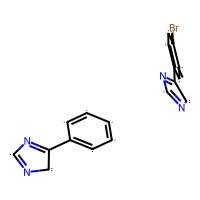

In [61]:
mol_df.drop(columns = ['ID']).head()

### Viewing Reconstructed Molecules (.xyz files)

The reconstructed molecules with full bonds between their atoms are generated.

In [7]:
!python -m pip install git+https://github.com/zotko/xyz2graph.git

  Cloning https://github.com/zotko/xyz2graph.git to /tmp/pip-req-build-4b1ebbq5
  Running command git clone --filter=blob:none --quiet https://github.com/zotko/xyz2graph.git /tmp/pip-req-build-4b1ebbq5
  Resolved https://github.com/zotko/xyz2graph.git to commit a1ce9d1b9e08c5ecd69d4916e1455f6940f974d6
  Preparing metadata (setup.py) ... done
  Created wheel for xyz2graph: filename=xyz2graph-2.0.0-py3-none-any.whl size=6075 sha256=037f88ef8e3501cda2b2aad2cbe16fd00fd4111995ad000e966416ba0ec949bf
  Stored in directory: /tmp/pip-ephem-wheel-cache-f8en26iv/wheels/32/0d/3f/52027ebbb7e64a4ba57684b5a2dd22f13d8f268ab0b1654348
Successfully built xyz2graph


In [11]:
!pip3 install xyz2graph plotly

In [62]:
import os
import glob
from xyz2graph import MolGraph, to_plotly_figure
from plotly.offline import init_notebook_mode

xyz_files = glob.glob(os.path.join("/content/output_molecules", '*.xyz'))
init_notebook_mode(connected=True)

for xyz_image in xyz_files:
  mg = MolGraph()
  mg.read_xyz(xyz_image)
  mol_fig = to_plotly_figure(mg)
  mol_fig.show(renderer="colab")

### Viewing Contents of Ground Truth and Outputs

In [71]:
!pip3 install ase

In [88]:
from ase.io import read
def print_atoms_and_their_positions(path):
    atoms = read(path)
    positions = atoms.get_positions()
    symbols = atoms.get_chemical_symbols()

    print(f"{len(positions)} atoms \n\n")
    for i in range(len(positions)):
        print(f"{symbols[i]} \t [{positions[i][0]} , {positions[i][1]}, {positions[i][2]}]")

In [89]:
print("Ground Truth Fragments")
print_atoms_and_their_positions('/content/examples_5ou2_fragments.sdf')

Ground Truth Fragments
23 atoms 


N 	 [135.6651 , -15.3583, 0.1325]
C 	 [134.8356 , -14.4706, -0.4078]
N 	 [134.5969 , -13.5549, 0.5236]
C 	 [135.2672 , -13.8787, 1.6104]
C 	 [135.9361 , -15.0095, 1.3626]
C 	 [135.2407 , -13.1072, 2.8878]
C 	 [135.5339 , -13.7328, 4.0539]
C 	 [135.5239 , -13.0695, 5.2284]
C 	 [135.1995 , -11.7489, 5.281]
C 	 [134.9023 , -11.1173, 4.1089]
C 	 [134.9113 , -11.7774, 2.9035]
Br 	 [135.1362 , -10.8138, 6.9517]
N 	 [126.8521 , -19.0355, 0.2522]
C 	 [126.0921 , -18.0299, -0.236]
N 	 [126.8721 , -17.2548, -1.0322]
C 	 [128.1098 , -17.7707, -1.0325]
C 	 [128.0889 , -18.8815, -0.2256]
C 	 [129.3145 , -17.2106, -1.7791]
C 	 [130.585 , -17.7185, -1.5264]
C 	 [131.6879 , -17.2095, -2.1865]
C 	 [131.5211 , -16.1844, -3.1052]
C 	 [130.2586 , -15.6644, -3.3699]
C 	 [129.1548 , -16.1795, -2.7058]


In [95]:
print("Reconstructed Molecules")
for count, reconstructed_output in enumerate(xyz_files):
    print('\n***************************************************************\n')
    print(f"{count}th Output")
    print_atoms_and_their_positions(reconstructed_output)

Reconstructed Molecules

***************************************************************

0th Output
26 atoms 


N 	 [135.665100098 , -15.358300209, 0.132499993]
C 	 [134.835601807 , -14.470600128, -0.407800019]
N 	 [134.596893311 , -13.554900169, 0.523599982]
C 	 [135.267196655 , -13.878700256, 1.610399961]
C 	 [135.936096191 , -15.00949955, 1.362599969]
C 	 [135.240707397 , -13.107199669, 2.887799978]
C 	 [135.533905029 , -13.73279953, 4.053899765]
C 	 [135.523895264 , -13.069499969, 5.22840023]
C 	 [135.199493408 , -11.748900414, 5.281000137]
C 	 [134.902297974 , -11.117300034, 4.10890007]
C 	 [134.911300659 , -11.777400017, 2.90350008]
Br 	 [135.136199951 , -10.813799858, 6.951700211]
N 	 [126.852096558 , -19.035499573, 0.252200007]
C 	 [126.092102051 , -18.029899597, -0.236000001]
N 	 [126.87210083 , -17.254800797, -1.03219986]
C 	 [128.109802246 , -17.770700455, -1.032500029]
C 	 [128.088897705 , -18.881500244, -0.225600004]
C 	 [129.314498901 , -17.210599899, -1.779099941]
C 	 [